# <center>GRIP - The Spark Foundation</center>
<img src='https://media.glassdoor.com/sqll/2143300/the-sparks-foundation-squarelogo-1556515236044.png' width="100" height="100">

### <center><font color=7E4456>Data Science and Business Analytics Internship</font></center>  
### <center><font color=7E4456>By Khushboo Hiten Lodaya</font></center>

<font color=155E64>(Level - Advanced)</font>

<font color=155E64>Task 7 : Stock Market Prediction using Numerical and Textual Analysis</font>

<font color=155E64>Problem Statement: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines</font>

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas import datetime
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Import and read stock dataset

In [91]:
df=pd.read_csv('BSESN.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [92]:
df.isna().any() #to find null values

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [93]:
df.shape 

(5007, 7)

In [94]:
#dropping any null entries in our data
df.dropna(axis=0, inplace=True)
df.shape

(4931, 7)

In [95]:
df['Date'] = pd.to_datetime(df['Date']) #making the date as index
df.set_index('Date', inplace= True, drop=True)
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


## Plotting the chart of CLose Price

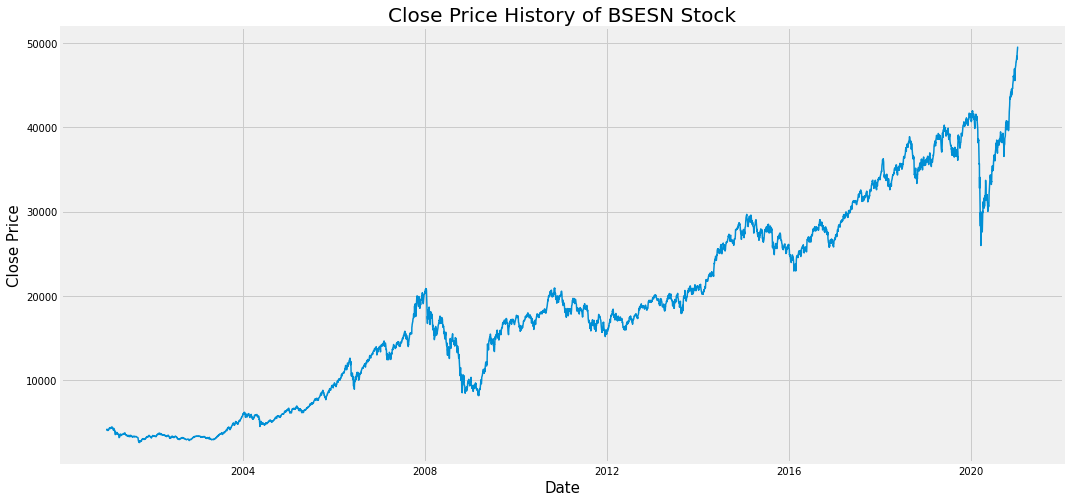

In [104]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History of BSESN Stock', fontsize=20)
plt.plot(df['Close'],linewidth=1.5)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price',fontsize=15)
plt.show()

<AxesSubplot:>

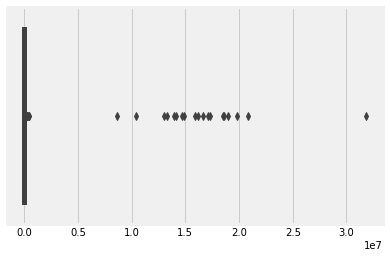

In [105]:
# To visualise how data is scattered before scaling
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df)

## Create a new data frame with only the closing price and convert it to an array. Then create a variable to store the length of the training data set. I want the training data set to contain about 80% of the data.

In [106]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

#Converting the dataframe to a numpy array
dataset = data.values

#Get /Compute the number of rows to train the model on
training_data_len = math.ceil(len(dataset) *0.8) 
print(training_data_len)


3945


## Now scale the data set to be values between 0 and 1 inclusive, Its generally good practice to scale your data before giving it to the neural network.

In [107]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.03023979],
       [0.03111666],
       [0.0322964 ],
       ...,
       [0.99471856],
       [1.        ],
       [0.99947164]])

## Boxplot after scaling the data

<AxesSubplot:>

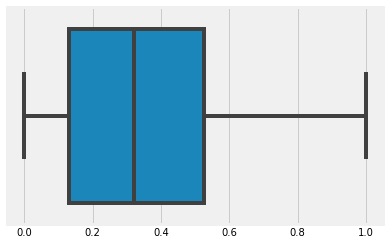

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(scaled_data)

In [109]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len, : ]#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [110]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [111]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

## Build the LSTM model to have two LSTM layers with 50 neurons and two Dense layers, one with 25 neurons and the other with 1 neuron.

In [112]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(1))
model

In [113]:
#Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [114]:
#Train the model
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=1)

3885/3885 [==============================] - 90s 23ms/step - loss: 3.9141e-04


In [115]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [116]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [117]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [118]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling
predictions

array([[27495.873],
       [27542.457],
       [27623.055],
       [27721.482],
       [27810.14 ],
       [27888.59 ],
       [27940.95 ],
       [27977.08 ],
       [28008.053],
       [27986.771],
       [27961.045],
       [27978.447],
       [28064.656],
       [28194.521],
       [28317.566],
       [28387.4  ],
       [28503.006],
       [28630.39 ],
       [28744.676],
       [28867.312],
       [28955.398],
       [29007.436],
       [29041.611],
       [29062.484],
       [29076.83 ],
       [29083.916],
       [29056.965],
       [29044.758],
       [29067.404],
       [29132.746],
       [29222.305],
       [29325.26 ],
       [29422.113],
       [29487.764],
       [29518.342],
       [29568.254],
       [29592.807],
       [29602.324],
       [29638.93 ],
       [29671.992],
       [29682.994],
       [29687.893],
       [29691.908],
       [29776.309],
       [29871.771],
       [29988.967],
       [30106.146],
       [30182.826],
       [30224.79 ],
       [30192.219],


In [22]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1117.0661505431972

## Visualisations

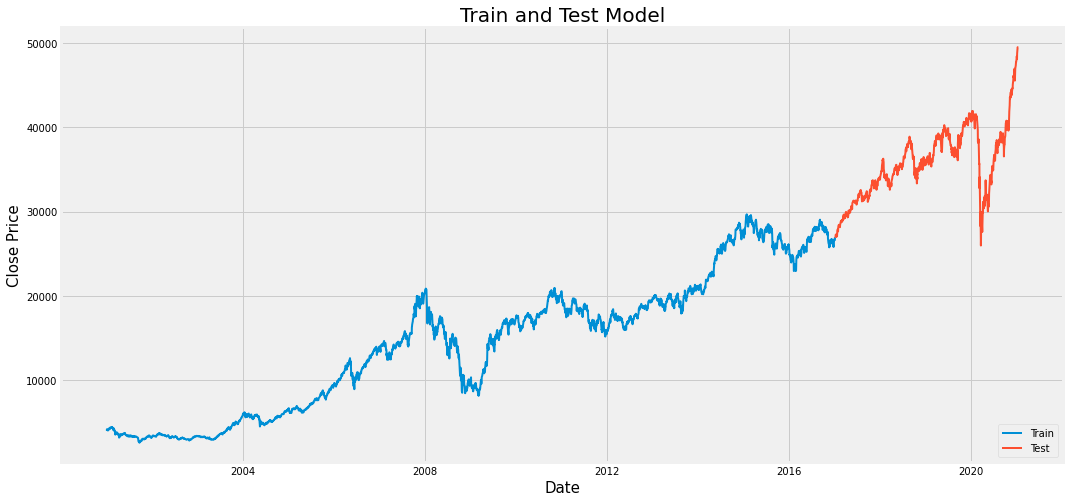

In [23]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Train and Test Model', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.plot(train['Close'], linewidth=2)
plt.plot(valid['Close'],linewidth=2)
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

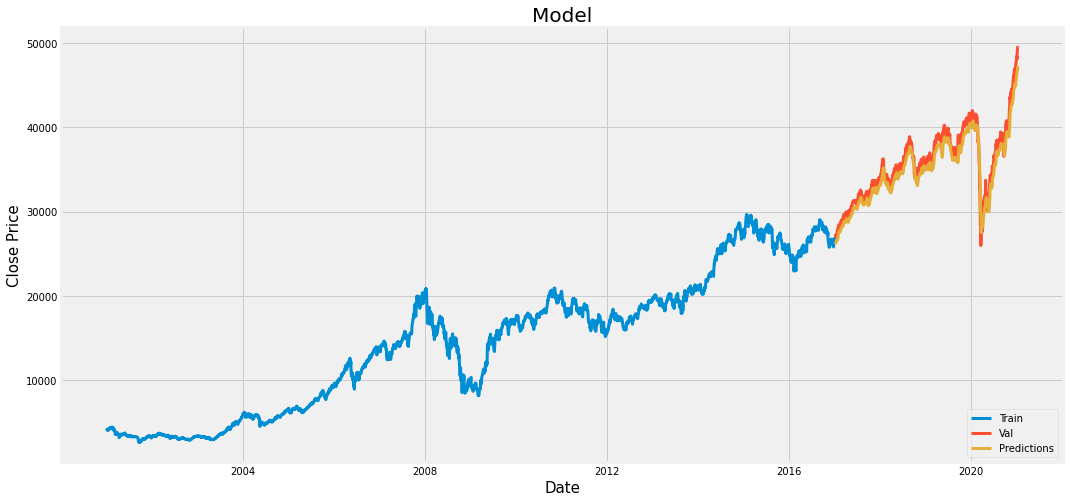

In [24]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.plot(train['Close'],linewidth=3)
plt.plot(valid[['Close', 'Predictions']],linewidth=3)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

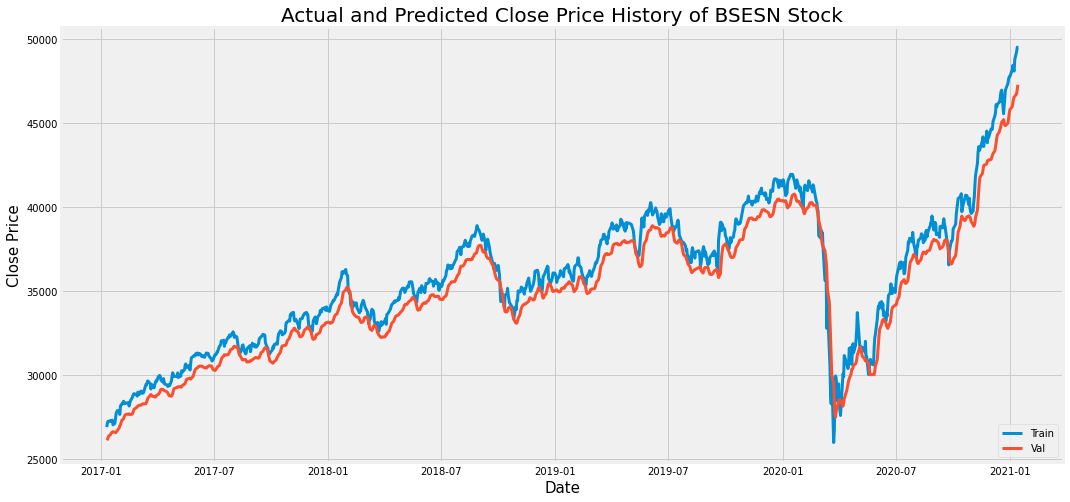

In [25]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Actual and Predicted Close Price History of BSESN Stock', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price', fontsize=15)

plt.plot(valid[['Close', 'Predictions']],linewidth=3)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2017-01-10,26899.560547,26123.039062
2017-01-11,27140.410156,26166.132812
2017-01-12,27247.160156,26253.871094
2017-01-13,27238.060547,26360.744141
2017-01-16,27288.169922,26451.394531
...,...,...
2021-01-07,48093.320313,46552.820312
2021-01-08,48782.511719,46591.398438
2021-01-11,49269.320313,46746.109375


## Import the news headlines dataset

In [10]:
cols = ['Date','Category','News']
df_news = pd.read_csv('india-news-headlines.csv', names = cols)
df_news

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?
...,...,...,...
3297168,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297169,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297170,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297171,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [11]:
df_news.drop(0, inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297172 entries, 1 to 3297172
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Date      object
 1   Category  object
 2   News      object
dtypes: object(3)
memory usage: 100.6+ MB


In [12]:
#Converting data type of Date column 
df_news.drop('Category', axis = 1, inplace = True)
df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')
df_news

,Date,News
1,2001-01-01,win over cena satisfying but defeating underta...
2,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02,Fissures in Hurriyat over Pak visit
4,2001-01-02,America's unwanted heading for India?
5,2001-01-02,For bigwigs; it is destination Goa
...,...,...
3297168,2020-06-30,why tiktok removed 1 65 crore videos in india
3297169,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297170,2020-06-30,kangana ranaut gets a doll version of herself ...
3297171,2020-06-30,meezaan jaffrey reminisces his childhood days ...


In [13]:
#Grouping the headlines for each day
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...
7076,2020-06-27,like me i wont let you have a toxic relationsh...
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


# Calculation Subjectivity and Polarity

In [15]:
from textblob import TextBlob

In [17]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity #between 0 and 1

def getPolarity(text):
    return  TextBlob(text).sentiment.polarity  #between -1 and 1

In [20]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

,Date,News,Subjectivity,Polarity
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
2,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462
3,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
4,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024
...,...,...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...,0.381841,0.068333
7076,2020-06-27,like me i wont let you have a toxic relationsh...,0.398808,0.079290
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...,0.402636,0.057636
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...,0.396828,0.061956


In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer

## To determine weather the sentiments are positive, negetive or neutral and the opinion was public or factual

In [84]:
temp = ['Positive', 'Negative', 'Neutral']
temp1 = ['Factual', 'Public']
polarity = []
subjectivity = []
for i in range(len(df_news)):
    pol = df_news.iloc[i]['Polarity']
    sub = df_news.iloc[i]['Subjectivity']
    if pol<0:
        polarity.append(temp[1])
    elif pol==0:
        polarity.append(temp[2])
    else:
        polarity.append(temp[0])
        
    
    if sub>=0.4:
        subjectivity.append(temp1[1])
    else:
        subjectivity.append(temp1[0])
        

In [85]:
df_news['Sentiment'] = polarity
df_news['Opinion'] = subjectivity
df_news.head(5)

,Date,News,Subjectivity,Polarity,Sentiment,Opinion
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333,Positive,Public
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,Positive,Factual
2,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,Positive,Public
3,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,Positive,Public
4,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024,Positive,Public


In [86]:
df_news[df_news['Sentiment']=='Positive']['News'].head()

0    win over cena satisfying but defeating underta...
1    Status quo will not be disturbed at Ayodhya; s...
2    Powerless north India gropes in the dark Think...
3    The string that pulled Stephen Hawking to Indi...
4    Light combat craft takes India into club class...
Name: News, dtype: object

In [87]:
df_news[df_news['Sentiment']=='Negative']['News'].head()

6     Muslim body rules out talks on Ayodhya Bajrang...
7     Sangh Parivar; Babri panel up the ante Frontru...
8     Financier Bharat Shah held for alleged links w...
24    Official toll put at 16;435; Kutch's share 14;...
26    Tobacco firms ordered off the field Consumer c...
Name: News, dtype: object

## Merging the news data and the stock data

In [97]:
merge = df_news.merge(df, how='inner', on='Date', left_index = True)
merge

,Date,News,Subjectivity,Polarity,Sentiment,Opinion,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,Positive,Factual,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,Positive,Public,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,Positive,Public,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024,Positive,Public,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,Sangh Parivar; Babri panel up the ante Frontru...,0.414653,-0.019214,Negative,Public,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4790,2020-06-24,I never thought I had a voice until today: Vid...,0.387802,0.088329,Positive,Factual,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
4791,2020-06-25,Truck firms look for new export markets to sel...,0.403998,0.027038,Positive,Public,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
4792,2020-06-26,Containment zone residents slam high prices ch...,0.381841,0.068333,Positive,Factual,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0
4793,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...,0.396828,0.061956,Positive,Factual,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0


In [100]:
df1 = merge[['Close','Subjectivity', 'Polarity']]
df1

,Close,Subjectivity,Polarity
0,4018.879883,0.282333,0.151333
1,4060.020020,0.407692,0.088462
2,4115.370117,0.446847,0.087961
3,4183.729980,0.476612,0.262024
4,4120.430176,0.414653,-0.019214
...,...,...,...
4790,34868.980469,0.387802,0.088329
4791,34842.101563,0.403998,0.027038
4792,35171.269531,0.381841,0.068333
4793,34961.519531,0.396828,0.061956


In [101]:
scaler = MinMaxScaler()
req = pd.DataFrame(scaler.fit_transform(df1))
req.columns = df1.columns
req.index=df1.index
req.head()

,Close,Subjectivity,Polarity
0,0.036053,0.282333,0.524545
1,0.037098,0.407692,0.438811
2,0.038505,0.446847,0.438129
3,0.040242,0.476612,0.675488
4,0.038633,0.414653,0.291981


In [102]:
X = req.drop('Close', 1)
y = req['Close']


print(X.head())
print(y.head())



   Subjectivity  Polarity
0      0.282333  0.524545
1      0.407692  0.438811
2      0.446847  0.438129
3      0.476612  0.675488
4      0.414653  0.291981
0    0.036053
1    0.037098
2    0.038505
3    0.040242
4    0.038633
Name: Close, dtype: float64


In [146]:
trainSet = req[: int(0.75*(len(req)))]
testSet = req[int(0.75*(len(req))):]

In [147]:
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(endog = trainSet)
fit = model.fit()

/root/snap/jupyter/common/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [177]:
pred = fit.forecast(fit.y, steps=len(testSet))
predictions = pd.DataFrame(pred, columns=req.columns)

In [178]:
predictions.head()

,Close,Subjectivity,Polarity
0,0.647304,0.404268,0.416834
1,0.647462,0.402544,0.418541
2,0.647621,0.402468,0.418672
3,0.647780,0.402466,0.418687
4,0.647939,0.402465,0.418691


In [151]:
testSet.head()

,Close,Subjectivity,Polarity
3603,0.642352,0.460381,0.286353
3604,0.641164,0.425787,0.402447
3605,0.643708,0.411106,0.433396
3606,0.635479,0.385327,0.446845
3607,0.629336,0.409541,0.449083
